<a href="https://colab.research.google.com/github/taranpatel/cool/blob/main/Titanic_Survivor_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')
titanic.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Check for missing values
titanic.isnull().sum()

# Drop columns with too many missing values or irrelevant ones
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'adult_male'])

# Drop rows with any remaining missing values
titanic.dropna(inplace=True)

# Convert categorical columns into numerical using one-hot encoding
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'class'], drop_first=True)

# Final dataset preview
titanic.head()


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,False,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,True,False,True,False,True


In [3]:
# Step 3: Define input (X) and target (y)
X = titanic.drop(columns='survived')
y = titanic['survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7832167832167832

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82        80
           1       0.82      0.65      0.73        63

    accuracy                           0.78       143
   macro avg       0.79      0.77      0.77       143
weighted avg       0.79      0.78      0.78       143



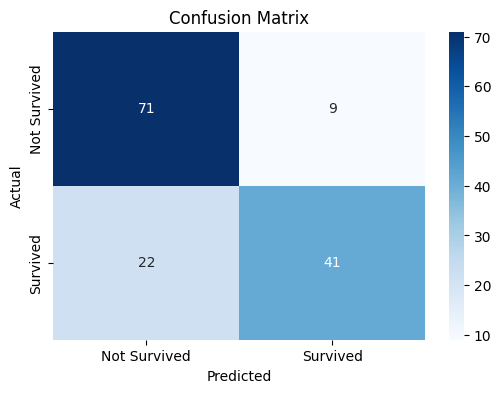

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
